## Project 1, tornadoes and mobile home parks in the US, risk analysis.

In [16]:
# import dependencies

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [17]:
# define paths for both files

tornadoes_data_path = "1950-2021_all_tornadoes.csv"
mobile_home_parks_path = "Mobile_Home_Parks.csv"

# Read the data from both csv's 

tornadoes_data = pd.read_csv(tornadoes_data_path)
mobile_home_data = pd.read_csv(mobile_home_parks_path)

display(tornadoes_data)
display(mobile_home_data) 


,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,1,0,0,4.0,0.0,36.7300,-102.5200,36.8800,-102.3000,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,3,3,0,5.0,0.0,34.1700,-78.6000,0.0000,0.0000,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,2,0,0,5.0,0.0,37.3700,-87.2000,0.0000,0.0000,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,1,0,0,5.0,0.0,38.2000,-84.5000,0.0000,0.0000,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,1,3,0,4.0,0.0,32.4200,-89.1300,0.0000,0.0000,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68863,620523,2021,9,8,2021-09-08,15:32:00,3,PA,42,0,1,0,0,0.0,0.0,40.7586,-77.0062,40.7507,-76.9959,0.73,30,1,1,1,109,0,0,0,0
68864,620524,2021,9,8,2021-09-08,15:35:00,3,PA,42,0,0,0,0,20000.0,0.0,40.7529,-76.9131,40.7561,-76.8878,1.45,30,1,1,1,109,0,0,0,0
68865,620525,2021,9,8,2021-09-08,19:08:00,3,FL,12,0,0,0,0,0.0,0.0,30.1599,-84.4497,30.1775,-84.4629,1.45,50,1,1,1,129,0,0,0,0
68866,620526,2021,9,9,2021-09-09,02:10:00,3,CT,9,0,0,0,0,40000.0,0.0,41.7500,-72.2990,41.7570,-72.2880,0.75,75,1,1,1,13,0,0,0,0


,index,X,Y,FID,MHPID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,UNITS,SIZE,YEARBLT,RevGeoFlag
0,0,-81.687714,28.852114,2001,2101,Sharp's Mobile Park,43 Sharp Circle,Not Available,Eustis,FL,32726,,352-357-5254,Mobile Home Park,Open,Lake,12069,US,28.852114,-81.687714,531190,Residential trailer parks,Open,1900-01-01T00:00:00.000Z,Both Internet and Imagery,2013-03-04T00:00:00.000Z,Not Available,0,Not Available,,No
1,1,-85.232052,30.771086,2002,2001,Stage Creek Trailer Park,4366 Pearl Street,Not Available,Marianna,FL,32446,,850-638-8570,Mobile Home Park,Open,Jackson,12063,US,30.771086,-85.232052,531190,Residential trailer parks,Open,1900-01-01T00:00:00.000Z,Imagery or Map Only,2013-03-01T00:00:00.000Z,Not Available,0,Not Available,,No
2,2,-85.163627,30.789739,2003,2002,Springside Estates,5164 Copper Lane,Not Available,Marianna,FL,32446,,252-241-8399,Mobile Home Park,Open,Jackson,12063,US,30.789739,-85.163627,531190,Residential trailer parks,Open,1900-01-01T00:00:00.000Z,Imagery or Map Only,2013-03-01T00:00:00.000Z,Not Available,0,Not Available,,No
3,3,-81.687733,28.815828,2004,2102,Lake Saunders Mobile Home Park,4301 Hwy 19A,Not Available,Mount Dora,FL,32757,,407-704-2136,Mobile Home Park,Open,Lake,12069,US,28.815828,-81.687733,531190,Mobile (manufactured) home parks,Open,1900-01-01T00:00:00.000Z,Imagery or Map Only,2013-03-06T00:00:00.000Z,Not Available,0,Not Available,,No
4,4,-81.784127,28.529614,2005,2103,Jones Cypress Cove Resort,10233 Cypress Cove Lane,Not Available,Clermont,FL,34711,,352-394-7900,Mobile Home Park,Open,Lake,12069,US,28.529614,-81.784127,531190,Mobile (manufactured) home parks,Open,1900-01-01T00:00:00.000Z,Imagery or Map Only,2013-03-06T00:00:00.000Z,Not Available,0,Not Available,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38524,38524,-92.391481,34.884523,38525,41433,Not Available,14121 Overstreet Rd,Not Available,Maumelle,AR,72113,,Not Available,Mobile Home Park,Unknown,Pulaski,5119,US,34.884523,-92.391481,531190,Residential trailer parks,Imagery,2015-01-30T00:00:00.000Z,Both Internet and Imagery,2015-01-30T00:00:00.000Z,Not Available,0,S,,No
38525,38525,-84.350860,40.832630,38526,41219,Not Available,826 Skinner St,Not Available,Delphos,OH,45833,,Not Available,Mobile Home Park,Unknown,Van Wert,39161,US,40.832630,-84.350860,531190,Residential trailer parks,Imagery,2015-01-23T00:00:00.000Z,Both Internet and Imagery,2015-01-23T00:00:00.000Z,Not Available,0,M,,No
38526,38526,-83.823340,40.754216,38527,41220,Not Available,4525 State Route 235,Not Available,Ada,OH,45810,,Not Available,MHP/RV/Migrant Housing,Unknown,Hardin,39065,US,40.754216,-83.823340,721211,Recreational vehicle parks,Imagery,2015-01-23T00:00:00.000Z,Both Internet and Imagery,2015-01-23T00:00:00.000Z,Not Available,0,M,,No
38527,38527,-83.815211,40.769507,38528,41221,Not Available,547 E Lincoln Ave,Not Available,Ada,OH,45810,,Not Available,Mobile Home Park,Unknown,Hardin,39065,US,40.769507,-83.815211,531190,Residential trailer parks,Imagery,2015-01-23T00:00:00.000Z,Both Internet and Imagery,2015-01-23T00:00:00.000Z,Not Available,0,M,,No


In [18]:
# CLEANING DATA FOR BOTH CSV FILES
# Rename columns in tornadoes_data
clean_tornadoes_data = tornadoes_data.rename(columns={
    "yr": "year",
    "mo": "month",
    "dy": "day",
    "st": "state",
    "mag": "magnitude",
    "inj": "injuries",
    "fat": "fatalities",
    "loss": "propertyloss",
    "closs": "lossinmillions",
    "slat": "latitude",
    "slon": "longitude",
    "elat": "latitudeend",
    "elon": "longitudeend",
    "len": "lengthinmiles",
    "wid": "widthinyards",
    })
# Delete columns in tornadoes_data
clean_tornadoes_data = clean_tornadoes_data.drop(columns={"om","tz","stf","stn","ns","sn","sg","f1","f2","f3","f4","fc"})
clean_tornadoes_data = clean_tornadoes_data[(clean_tornadoes_data['latitude'] != 0) | (clean_tornadoes_data['longitude'] != 0)]
clean_tornadoes_data['latitude'] = clean_tornadoes_data['latitude'].round(1)
clean_tornadoes_data['longitude'] = clean_tornadoes_data['longitude'].round(1)
display(clean_tornadoes_data)
# Rename columns in mobile_home_data
clean_mobile_home_data = mobile_home_data.rename(columns={
    "NAME": "name",
    "ADDRESS": "address",
    "CITY": "city",
    "STATE": "state",
    "ZIP": "zipcode",
    "TELEPHONE": "telephone",
    "TYPE": "type",
    "STATUS": "status",
    "COUNTY": "county",
    "LATITUDE": "latitude",
    "LONGITUDE": "longitude"
    })
# Delete columns in mobile home parks data
clean_mobile_home_data = clean_mobile_home_data.drop(columns={
"X", "Y", "FID", "MHPID", "ADDRESS2", "ZIP4", "COUNTYFIPS",
"COUNTRY", "NAICS_CODE", "NAICS_DESC", "SOURCE",
"SOURCEDATE", "VAL_METHOD", "VAL_DATE", "WEBSITE","index",
"UNITS", "SIZE", "YEARBLT", "RevGeoFlag"})
clean_mobile_home_data = clean_mobile_home_data[(clean_mobile_home_data['latitude'] != 0) | (clean_mobile_home_data['longitude'] != 0)]
# Round coordinates to 4 decimal places
clean_mobile_home_data['latitude'] = clean_mobile_home_data['latitude'].round(1)
clean_mobile_home_data['longitude'] = clean_mobile_home_data['longitude'].round(1)
display(clean_mobile_home_data)

,year,month,day,date,time,state,magnitude,injuries,fatalities,propertyloss,lossinmillions,latitude,longitude,latitudeend,longitudeend,lengthinmiles,widthinyards
0,1950,10,1,1950-10-01,21:00:00,OK,1,0,0,4.0,0.0,36.7,-102.5,36.8800,-102.3000,15.80,10
1,1950,10,9,1950-10-09,02:15:00,NC,3,3,0,5.0,0.0,34.2,-78.6,0.0000,0.0000,2.00,880
2,1950,11,20,1950-11-20,02:20:00,KY,2,0,0,5.0,0.0,37.4,-87.2,0.0000,0.0000,0.10,10
3,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,0.0,38.2,-84.5,0.0000,0.0000,0.10,10
4,1950,11,20,1950-11-20,07:30:00,MS,1,3,0,4.0,0.0,32.4,-89.1,0.0000,0.0000,2.00,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68863,2021,9,8,2021-09-08,15:32:00,PA,1,0,0,0.0,0.0,40.8,-77.0,40.7507,-76.9959,0.73,30
68864,2021,9,8,2021-09-08,15:35:00,PA,0,0,0,20000.0,0.0,40.8,-76.9,40.7561,-76.8878,1.45,30
68865,2021,9,8,2021-09-08,19:08:00,FL,0,0,0,0.0,0.0,30.2,-84.4,30.1775,-84.4629,1.45,50
68866,2021,9,9,2021-09-09,02:10:00,CT,0,0,0,40000.0,0.0,41.8,-72.3,41.7570,-72.2880,0.75,75


,name,address,city,state,zipcode,telephone,type,status,county,latitude,longitude
0,Sharp's Mobile Park,43 Sharp Circle,Eustis,FL,32726,352-357-5254,Mobile Home Park,Open,Lake,28.9,-81.7
1,Stage Creek Trailer Park,4366 Pearl Street,Marianna,FL,32446,850-638-8570,Mobile Home Park,Open,Jackson,30.8,-85.2
2,Springside Estates,5164 Copper Lane,Marianna,FL,32446,252-241-8399,Mobile Home Park,Open,Jackson,30.8,-85.2
3,Lake Saunders Mobile Home Park,4301 Hwy 19A,Mount Dora,FL,32757,407-704-2136,Mobile Home Park,Open,Lake,28.8,-81.7
4,Jones Cypress Cove Resort,10233 Cypress Cove Lane,Clermont,FL,34711,352-394-7900,Mobile Home Park,Open,Lake,28.5,-81.8
...,...,...,...,...,...,...,...,...,...,...,...
38524,Not Available,14121 Overstreet Rd,Maumelle,AR,72113,Not Available,Mobile Home Park,Unknown,Pulaski,34.9,-92.4
38525,Not Available,826 Skinner St,Delphos,OH,45833,Not Available,Mobile Home Park,Unknown,Van Wert,40.8,-84.4
38526,Not Available,4525 State Route 235,Ada,OH,45810,Not Available,MHP/RV/Migrant Housing,Unknown,Hardin,40.8,-83.8
38527,Not Available,547 E Lincoln Ave,Ada,OH,45810,Not Available,Mobile Home Park,Unknown,Hardin,40.8,-83.8


In [19]:
#MERGING THE DATA
#setting display options to preview all columns
pd.set_option('display.max_columns', None) 

tornado_mobiles_merge=pd.merge(clean_tornadoes_data, clean_mobile_home_data, left_on=["longitude","latitude"],right_on=["longitude","latitude"])
merge_data_df = pd.DataFrame(tornado_mobiles_merge)

# Export the tornado_mobiles_merge data into a csv
merge_data_df.to_csv("../Project1Bootcamp/tornadoesandparksmerged.csv")

merge_data_df.head(5)

,year,month,day,date,time,state_x,magnitude,injuries,fatalities,propertyloss,lossinmillions,latitude,longitude,latitudeend,longitudeend,lengthinmiles,widthinyards,name,address,city,state_y,zipcode,telephone,type,status,county
0,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,0.0,38.2,-84.5,0.00,0.00,0.1,10,Spindletop Village,101 Dale Drive,Georgetown,KY,40324,502-863-5656,Mobile Home Park,Open,Scott
1,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,0.0,38.2,-84.5,0.00,0.00,0.1,10,Not Available,1175 Lisle Rd,Georgetown,KY,40324,Not Available,Mobile Home Park,Open,Scott
2,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,0.0,38.2,-84.5,0.00,0.00,0.1,10,Not Available,4812 Georgetown Rd,Lexington,KY,40511,Not Available,Mobile Home Park,Open,Fayette
3,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,0.0,38.2,-84.5,0.00,0.00,0.1,10,Not Available,1250 Paris Pike,Georgetown,KY,40324,Not Available,Mobile Home Park,Open,Scott
4,1977,10,1,1977-10-01,08:00:00,KY,1,0,0,5.0,0.0,38.2,-84.5,38.12,-84.38,9.2,400,Spindletop Village,101 Dale Drive,Georgetown,KY,40324,502-863-5656,Mobile Home Park,Open,Scott


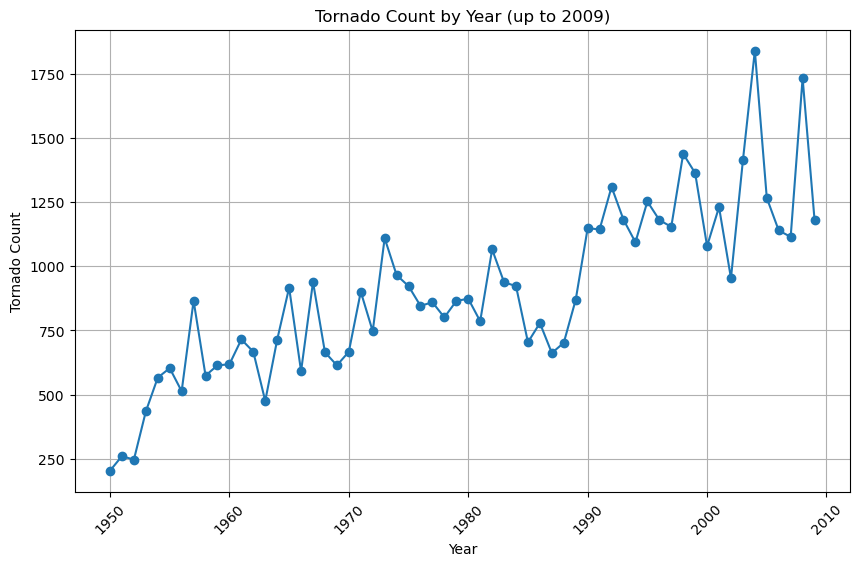

In [20]:
# Filter the data up to the year 2009
clean_tornadoes_data['year'] = pd.to_datetime(clean_tornadoes_data['year'], format='%Y')
clean_tornadoes_data = clean_tornadoes_data[clean_tornadoes_data['year'].dt.year <= 2009]

# Group the data by year and calculate the tornado count for each year
tornadoes_by_year = clean_tornadoes_data.groupby(clean_tornadoes_data['year'].dt.year).size()

# Plot the tornado count over time
plt.figure(figsize=(10, 6))
plt.plot(tornadoes_by_year.index, tornadoes_by_year.values, marker='o', linestyle='-')
plt.title('Tornado Count by Year (up to 2009)')
plt.xlabel('Year')
plt.ylabel('Tornado Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

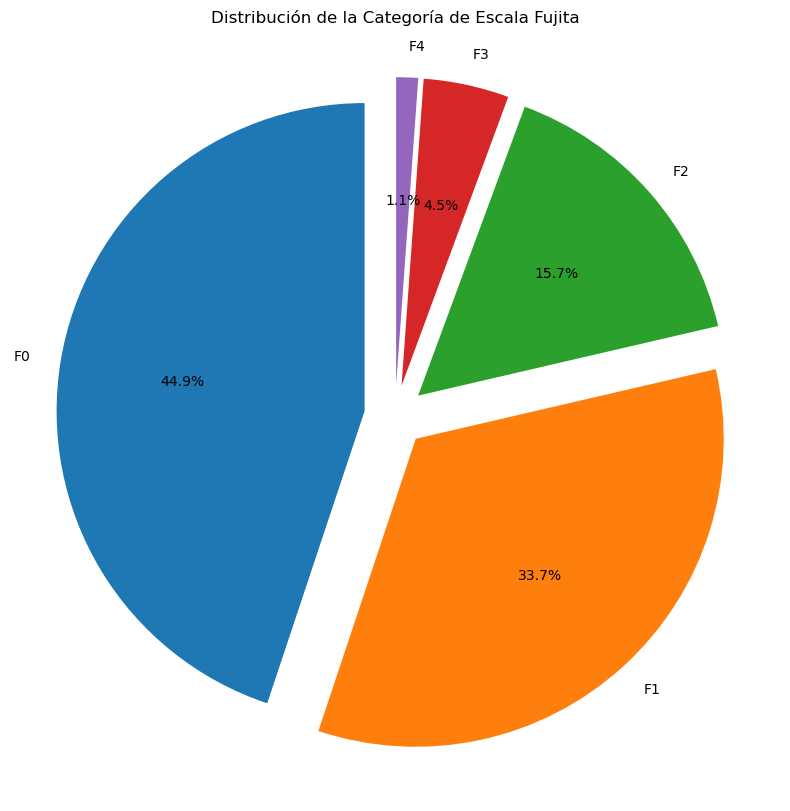

In [44]:
# Define a dictionary to map magnitudes to Fujita scale categories
fujita_scale_map = {0: 'F0', 1: 'F1', 2: 'F2', 3: 'F3', 4: 'F4'}
# Apply the mapping to create the 'fujita_scale_category' column
clean_tornadoes_data['fujita_scale_category'] = clean_tornadoes_data['magnitude'].map(fujita_scale_map)
# Calculate the distribution of the Fujita scale category
fujita_scale_distribution = clean_tornadoes_data['fujita_scale_category'].value_counts()
# Define explode values to separate the pies
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
# Plot a pie chart to show the distribution of the Fujita scale category

plt.figure(figsize=(10, 10))
fujita_scale_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode = explode)
plt.title('Distribución de la Categoría de Escala Fujita')
plt.ylabel('')  # Remove the y-axis label
plt.show()